# IMPORT LIBRARIES AND DATASETS

In [3]:
!pip3 install seaborn --upgrade

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.7 MB/s eta 0:00:00:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.42.0
    Uninstalling wheel-0.42.0:
      Successfully uninstalled wheel-0.42.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.2.2
    Uninstalling setuptools-68.2.2:
      Successfully uninstalled setuptools-68.2.2
  Using cached graphviz-0.8.4-py2.py3-none-any.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 52.2 MB/s eta 0:00:0000:0100:01
Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... do

In [6]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. Text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

In [31]:
insurance_df = pd.read_csv('insurance.csv')

In [8]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
# Generate statistical summary
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# Obtain dataset information
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# PERFORM DATA VISUALIZATION

In [14]:
# Check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

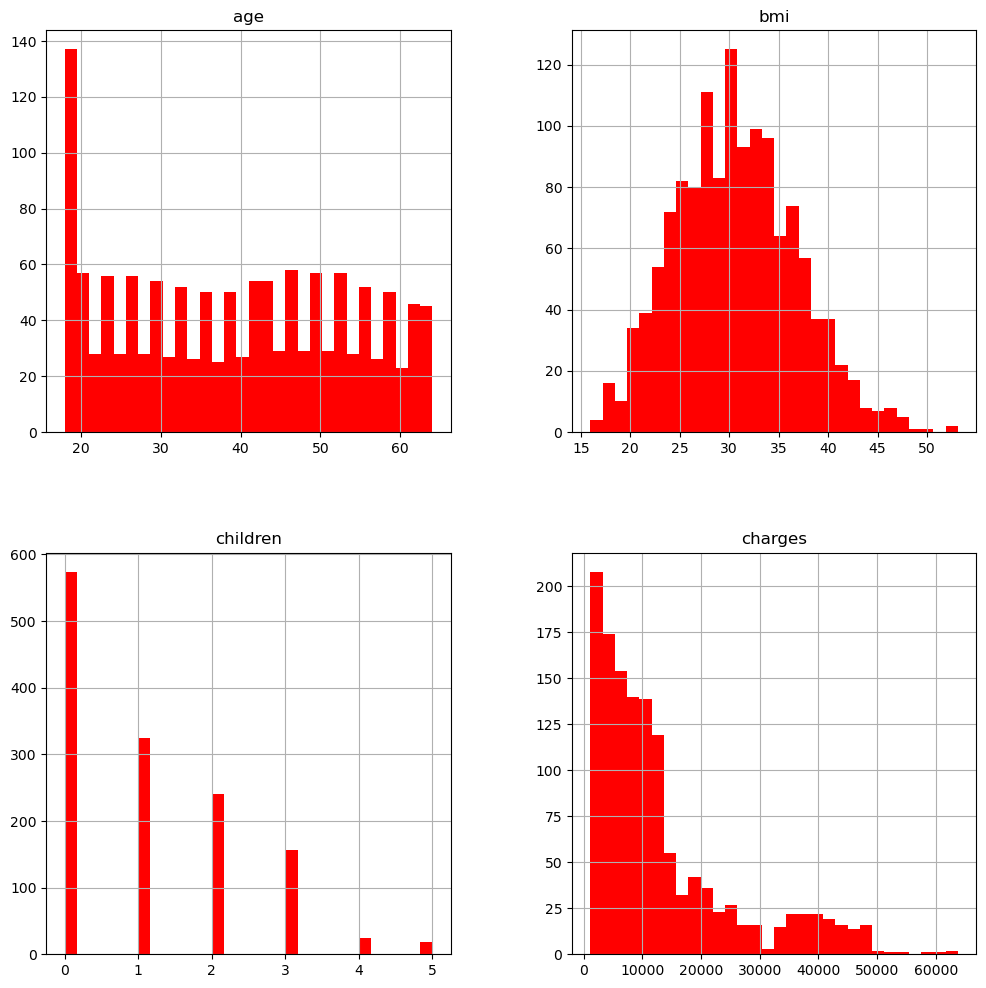

In [15]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (12, 12), color = 'r');


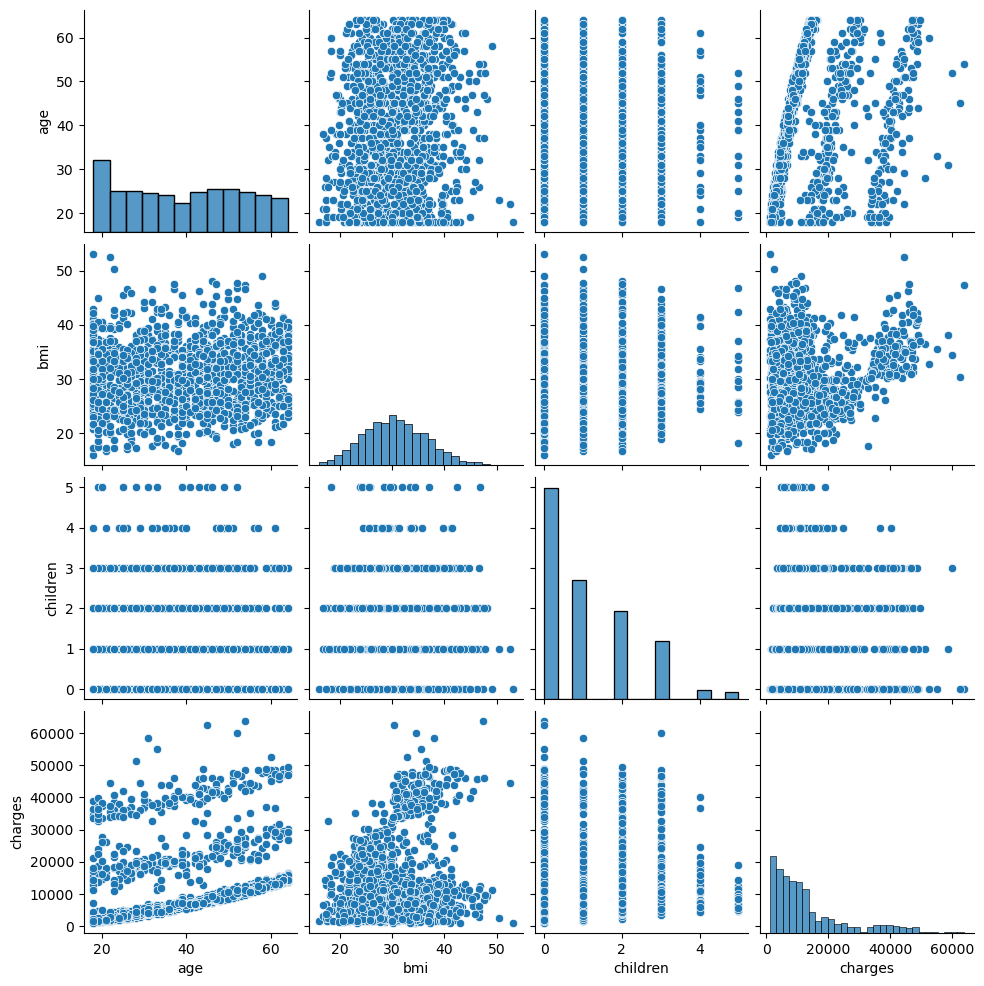

In [16]:
# Plot pairplot
sns.pairplot(insurance_df)

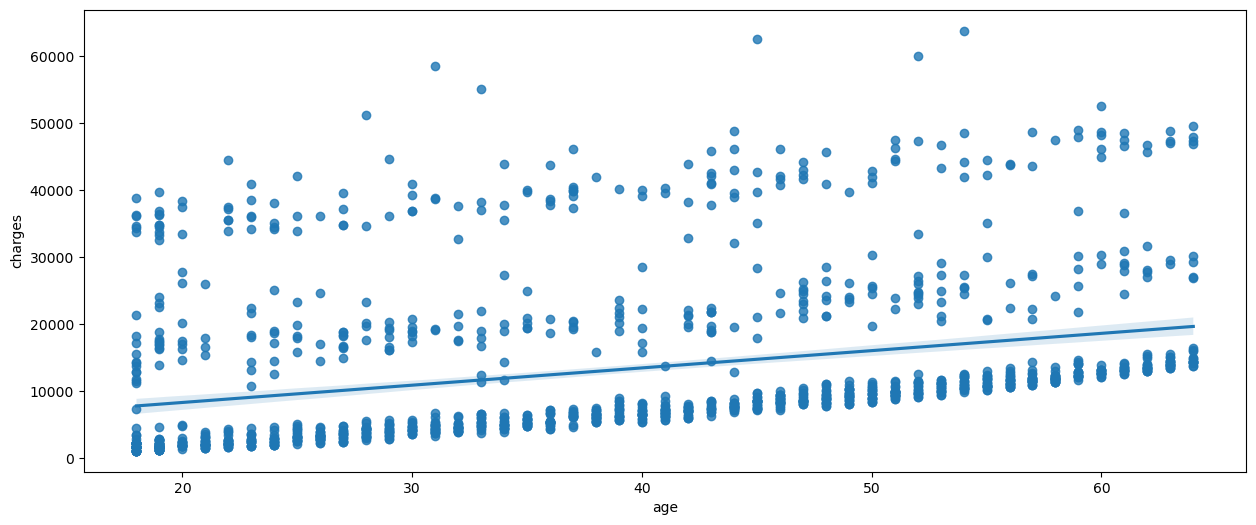

In [17]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

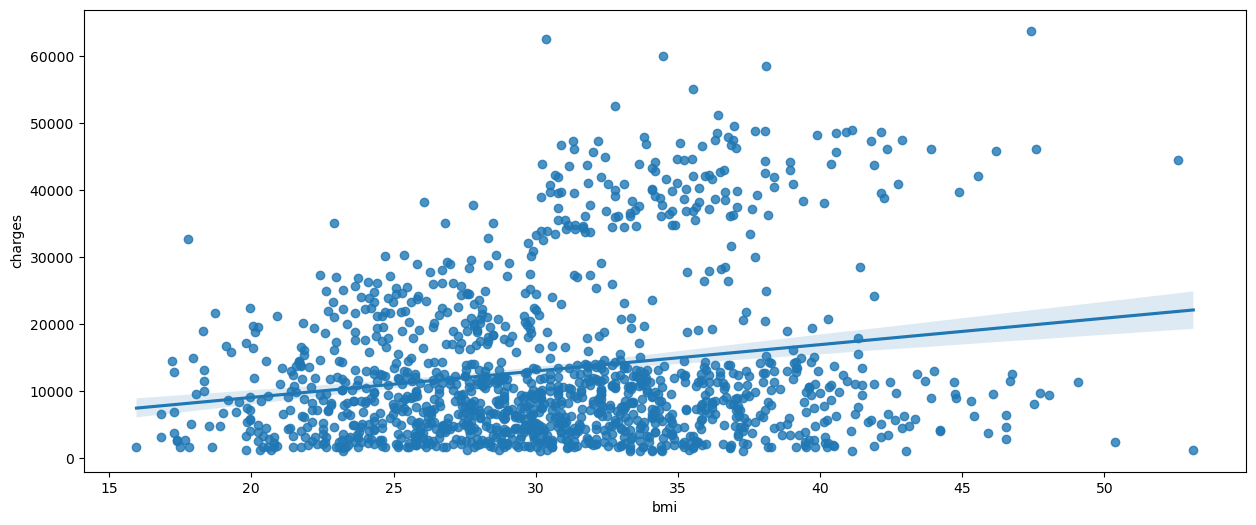

In [18]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()
  

In [34]:
corr_matrix = insurance_df.select_dtypes(include='number').corr()

<Axes: >

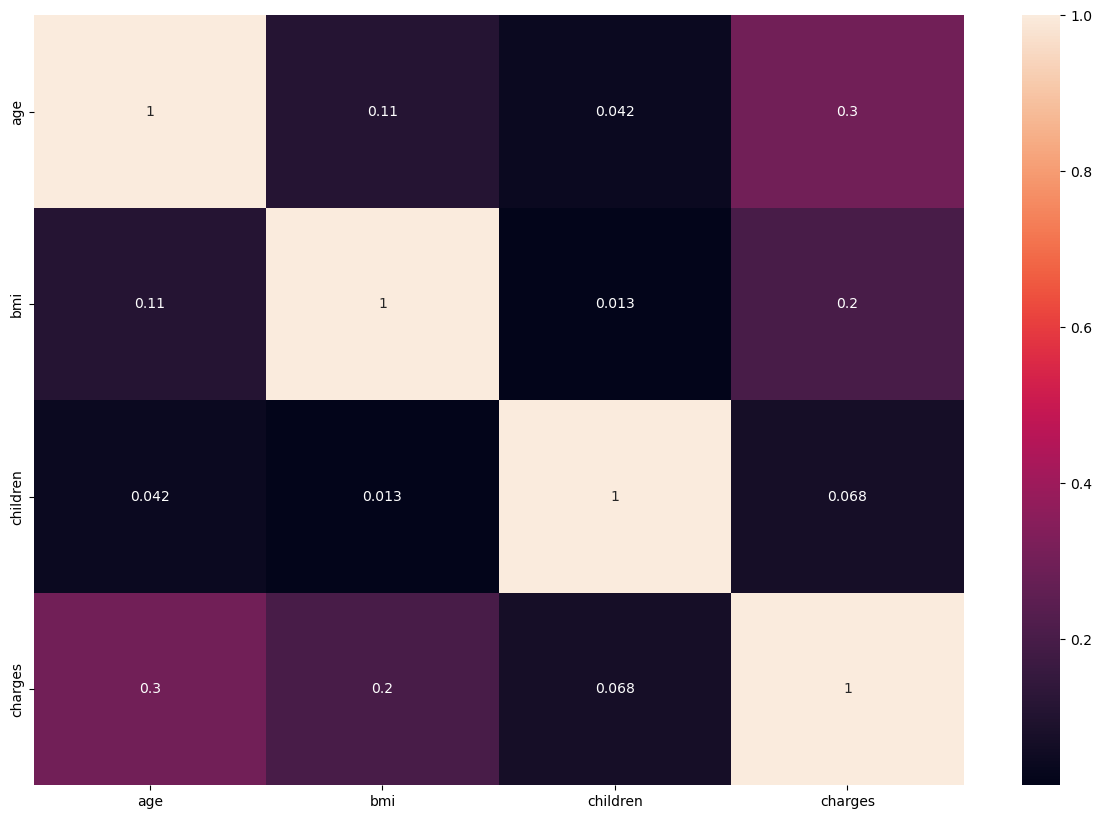

In [35]:
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, annot = True)

# TRAIN MULTIPLE MODELS USING AUTOGLUON (EVAL METRIC = R2)

In [36]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(insurance_df, test_size=0.2, random_state=0)

In [37]:
X_train

,age,sex,bmi,children,smoker,region,charges
621,37,male,34.100,4,yes,southwest,40182.24600
194,18,male,34.430,0,no,southeast,1137.46970
240,23,female,36.670,2,yes,northeast,38511.62830
1168,32,male,35.200,2,no,southwest,4670.64000
1192,58,female,32.395,1,no,northeast,13019.16105
...,...,...,...,...,...,...,...
763,27,male,26.030,0,no,northeast,3070.80870
835,42,male,35.970,2,no,southeast,7160.33030
1216,40,male,25.080,0,no,southeast,5415.66120
559,19,male,35.530,0,no,northwest,1646.42970


In [38]:
X_test

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,female,30.495,2,no,northwest,15019.76005
726,41,male,28.405,1,no,northwest,6664.68595
1132,57,male,40.280,0,no,northeast,20709.02034
725,30,female,39.050,3,yes,southeast,40932.42950


In [39]:
# Train multiple ML Regression models using AutoGluon
# Specify the target column, train_data, limit_time, and presets 
# AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column

predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20241210_062227"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 23 17:17:00 UTC 2024
CPU Count:          2
Memory Avail:       2.61 GB / 3.76 GB (69.4%)
Disk Space Avail:   8589934591.50 GB / 8589934592.00 GB (100.0%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit 

In [40]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.848908          r2       0.527331   84.245359                0.001385           0.152352            2       True          9
1      WeightedEnsemble_L3   0.848755          r2       0.496095   69.468046                0.000816           0.129273            3       True         11
2          CatBoost_BAG_L1   0.846672          r2       0.059541   24.003830                0.059541          24.003830            1       True          6
3        LightGBMXT_BAG_L2   0.841773          r2       0.933838  118.257018                0.061648          18.142908            2       True         10
4        LightGBMXT_BAG_L1   0.840820          r2       0.040637   14.940419                0.040637          14.940419            1       True          3
5       

/opt/conda/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.07448567993942246,
  'KNeighborsDist_BAG_L1': -0.16102308298670942,
  'LightGBMXT_BAG_L1': 0.8408198040276409,
  'LightGBM_BAG_L1': 0.8396145120831351,
  'RandomForestMSE_BAG_L1': 0.8227276280725969,
  'CatBoost_BAG_L1': 0.8466715382588097,
  'ExtraTreesMSE_BAG_L1': 0.8218176959677763,
  'NeuralNetFastAI_BAG_L1': 0.8356373462385923,
  'Weig

# EVALUATE TRAINED MODELS PERFORMANCE

In [41]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.848908,r2,0.527331,84.245359,0.001385,0.152352,2,True,9
1,WeightedEnsemble_L3,0.848755,r2,0.496095,69.468046,0.000816,0.129273,3,True,11
2,CatBoost_BAG_L1,0.846672,r2,0.059541,24.003830,0.059541,24.003830,1,True,6
3,LightGBMXT_BAG_L2,0.841773,r2,0.933838,118.257018,0.061648,18.142908,2,True,10
4,LightGBMXT_BAG_L1,0.840820,r2,0.040637,14.940419,0.040637,14.940419,1,True,3
5,LightGBM_BAG_L1,0.839615,r2,0.030668,14.754235,0.030668,14.754235,1,True,4
6,NeuralNetFastAI_BAG_L1,0.835637,r2,0.180532,43.740265,0.180532,43.740265,1,True,8
7,RandomForestMSE_BAG_L1,0.822728,r2,0.255206,1.594678,0.255206,1.594678,1,True,5
8,ExtraTreesMSE_BAG_L1,0.821818,r2,0.267263,1.062117,0.267263,1.062117,1,True,7
9,KNeighborsUnif_BAG_L1,-0.074486,r2,0.018945,0.008207,0.018945,0.008207,1,True,1


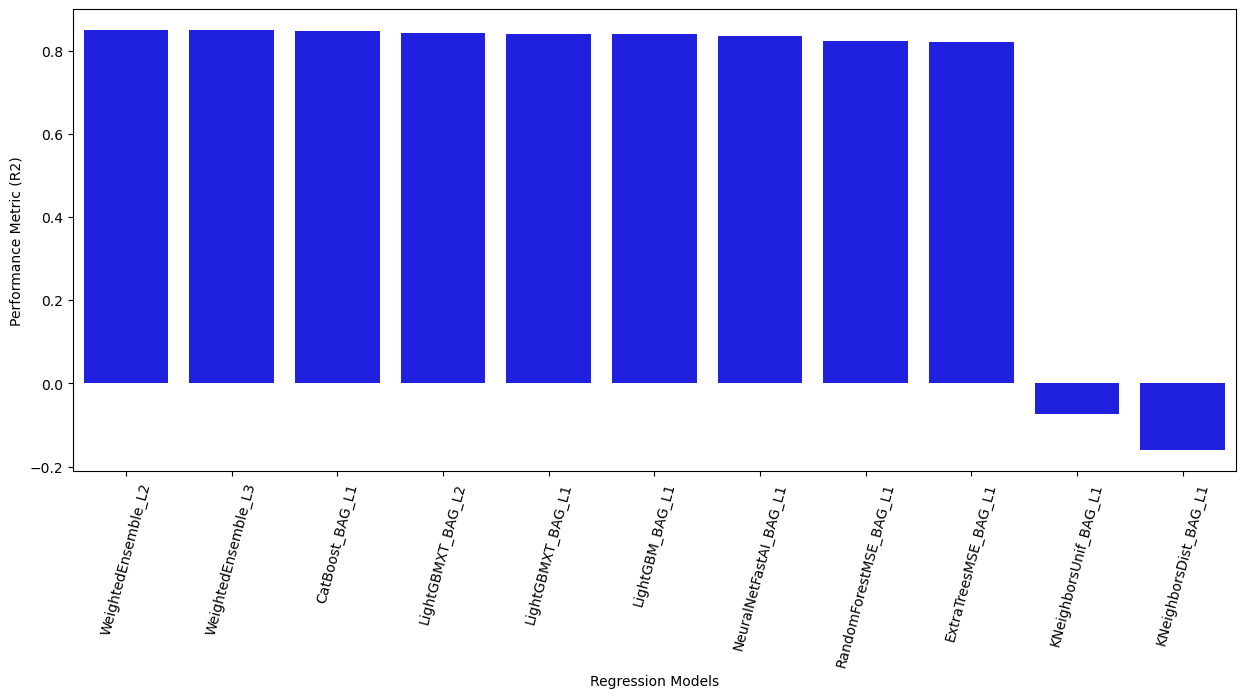

In [43]:
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 75);


In [44]:
predictor.evaluate(X_test)

{'r2': 0.9033852591001339,
 'root_mean_squared_error': -3921.0075336777436,
 'mean_squared_error': -15374300.079157623,
 'mean_absolute_error': -2399.406453080165,
 'pearsonr': 0.9512599355448846,
 'median_absolute_error': -1584.25925234375}

In [45]:
# Assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [11564.271484375, 10134.74609375, 45707.9765625, 13783.3994140625, 10525.8203125]


In [46]:
X_test

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,female,30.495,2,no,northwest,15019.76005
726,41,male,28.405,1,no,northwest,6664.68595
1132,57,male,40.280,0,no,northeast,20709.02034
725,30,female,39.050,3,yes,southeast,40932.42950


In [47]:
y_test = X_test['charges']
y_test #groundtruth

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

Text(0.5, 0, 'True Values')

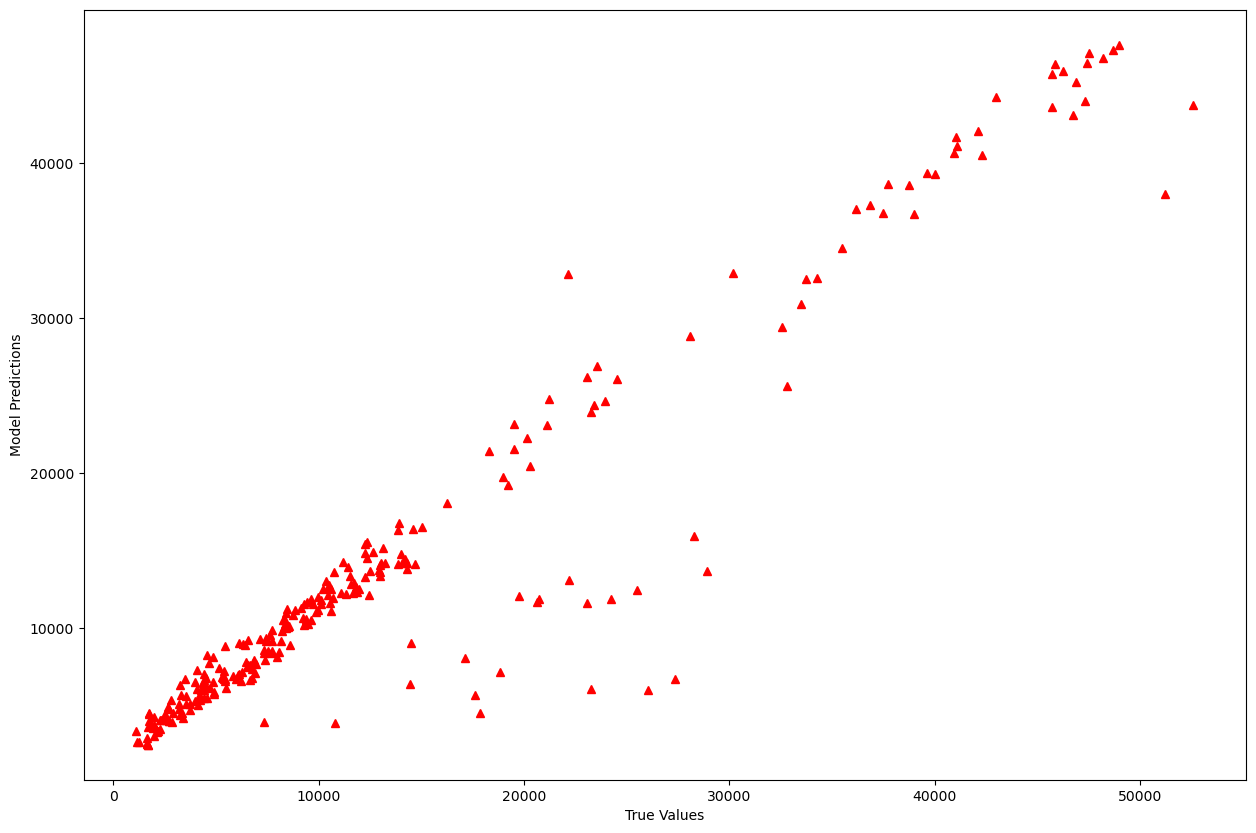

In [48]:
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')


In [59]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 3921.008 
MSE = 15374300.079157623 
MAE = 2399.406453080165 
R2 = 0.9033852591001339
